# Car Price Prediction
- **Name:**        **Deepa Kushwaha**
- **Project:**  **Prediction of Car Price** **,14 July 2019**


**Problem Statement**                                                                                
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Understanding the Data



In [975]:
# Loading Packages
import pandas as pd
import numpy as np                      # For mathematical calculations 
import matplotlib.pyplot as plt         # For plotting graphs 
import seaborn as sns                   # For visualizations

%matplotlib inline

import warnings                        # To ignore any warnings
warnings.filterwarnings('ignore')

In [976]:
#Getting the system ready and loading the data

car_df = pd.read_csv("C:\\Users\\deepa\Desktop\\Assignment5\\CarPrice_Assignment.csv")
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [977]:
car_df.shape              # rows = 205 & column = 26

(205, 26)

In [978]:
car_df.describe()         # overview the statitics of car_df part

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [979]:
car_df.columns            # we will check the features present in our car_df   

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Data cleaning 
Let's now conduct some car_df cleaning steps

In [980]:
# summary of car_df that total car_df numbers 205(rows) & their is no null values 
car_df.info()    # variable format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

**We've seen that there are no missing values in the car_dfset. We've also seen that variables are in the correct format, except symboling, which should rather be a categorical variable.**

In [981]:
# +3 indicates that the auto is risky 
#-3 that it is probably pretty safe

car_df['symboling']= car_df['symboling'].astype('object')

car_df.info()

''' Now all variables are in the correct format.'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null object
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm     

' Now all variables are in the correct format.'

In [982]:
# split CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'.
# I need only company name as the independent variable for model building.

CompanyName = car_df['CarName'].apply(lambda x: x.split(" ")[0])
car_df.insert(3,'CompanyName', CompanyName)
car_df.drop(['CarName'], axis=1, inplace= True)
car_df.drop(['car_ID'], axis= 1, inplace= True)

In [983]:
car_df.head()     # Check the first few rows of the dataset after Converting CompanyName

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [915]:
car_df['CompanyName'].unique()     # check total model

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Notics that some Car company names are misspelled:**

*Incorrect      |      correct**
- vw&vokswagen  - volkswagen

- porcshce        - porsche 

- toyouta       - toyota 

- Nissan        - nissan 

- maxda         - mazda


In [916]:
# replacing misspelled CarCompany names
car_df.CompanyName= car_df.CompanyName.str.lower()

def replace_CompanyName(a,b):
    car_df.CompanyName.replace(a,b, inplace = True)

replace_CompanyName('porcshce','porsche')
replace_CompanyName('toyouta',  'toyota')
replace_CompanyName('Nissan',   'nissan')
replace_CompanyName('maxda',    'mazda')
replace_CompanyName( 'vw',  'volkswagen')
replace_CompanyName('vokswagen','volkswagen')
car_df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [917]:
# Create a list of numeric variables
num_vars = list(car_df.select_dtypes(exclude='object').columns)

In [918]:
num_vars

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [919]:
# Check if there are any duplicate rows
car_df.duplicated().sum()

0

In [920]:
## Check data quality issues in 'fuelsystem'
car_df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [921]:
car_df.fueltype.value_counts()     # categories counts Fuel Type

gas       185
diesel     20
Name: fueltype, dtype: int64

In [922]:
car_df.aspiration.value_counts()     # categories counts Aspiration

std      168
turbo     37
Name: aspiration, dtype: int64

In [923]:
car_df.carbody.value_counts()        # categories counts Car Body

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [924]:
car_df.CompanyName.value_counts()       ## categories counts Cars_Company_name

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: CompanyName, dtype: int64

In [925]:
car_df.enginetype.value_counts()         ## categories counts Engine_Type

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [926]:
# Check unique values(categories) present in the categorical attributes
categories_vars = list(car_df.select_dtypes(include='object').columns)

for col in categories_vars:
    
    print("Column Name : {}\n Number of Categories: {}\n Unique Values : {} \n"\
              .format(col, car_df[col].nunique(), car_df[col].unique()))

Column Name : symboling
 Number of Categories: 6
 Unique Values : [3 1 2 0 -1 -2] 

Column Name : CompanyName
 Number of Categories: 22
 Unique Values : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo'] 

Column Name : fueltype
 Number of Categories: 2
 Unique Values : ['gas' 'diesel'] 

Column Name : aspiration
 Number of Categories: 2
 Unique Values : ['std' 'turbo'] 

Column Name : doornumber
 Number of Categories: 2
 Unique Values : ['two' 'four'] 

Column Name : carbody
 Number of Categories: 5
 Unique Values : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 

Column Name : drivewheel
 Number of Categories: 3
 Unique Values : ['rwd' 'fwd' '4wd'] 

Column Name : enginelocation
 Number of Categories: 2
 Unique Values : ['front' 'rear'] 

Column Name : enginetype
 Number of Categories: 7
 Unique Values : ['dohc' 'ohcv' 

### Exploratory Data Analysis  (EDA)

1. Univariate Analysis and
2. Bivariate Analysis

#### Univariate Analysis
**In this section, we will do univariate analysis. It is the simplest form of analyzing car_df where we examine each variable individually.**

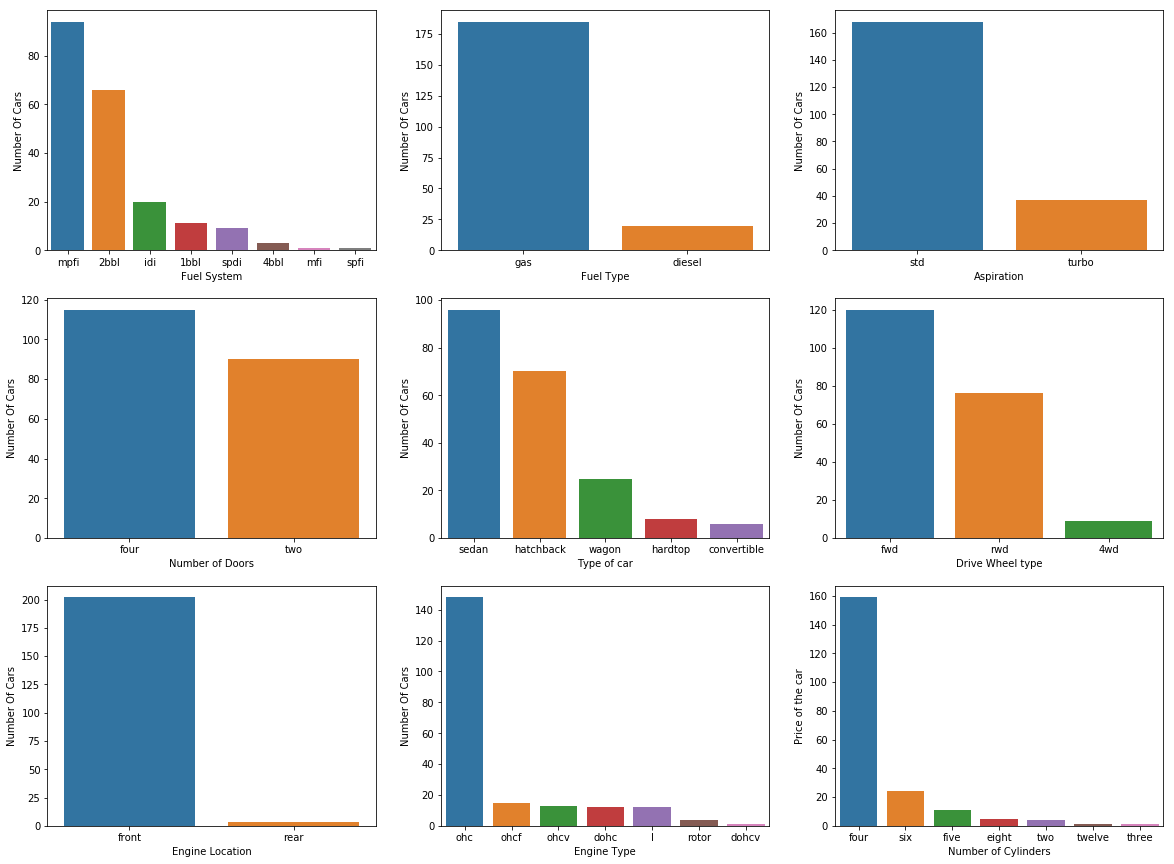

In [927]:
# Plotting Bar Graphs
plt.figure(figsize=(20, 15))

# Fuel System
plt.subplot(331)
df = car_df['fuelsystem'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Fuel System", ylabel="Number Of Cars")

# Fuel Type
plt.subplot(332)
df = car_df['fueltype'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Fuel Type", ylabel="Number Of Cars")

# Aspiration
plt.subplot(333)
df = car_df['aspiration'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Aspiration", ylabel="Number Of Cars")

#Door number
plt.subplot(334)
df = car_df['doornumber'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Number of Doors", ylabel="Number Of Cars")

#Type of car
plt.subplot(335)
df = car_df['carbody'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Type of car", ylabel="Number Of Cars")

#Drive Wheel type
plt.subplot(336)
df = car_df['drivewheel'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Drive Wheel type", ylabel="Number Of Cars")

#Engine Location
plt.subplot(337)
df = car_df['enginelocation'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Engine Location", ylabel="Number Of Cars")

#Engine Type
plt.subplot(338)
df = car_df['enginetype'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Engine Type", ylabel="Number Of Cars")

#Number of Cylinders
plt.subplot(339)
df = car_df['cylindernumber'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Number of Cylinders", ylabel="Price of the car")

plt.show()


* As we have noticed from the above plots that the fuel types mpfi and 2bbl have higher demand
* Analysis for Fuel Type variable we can see that Diesel cars is slightly higher than the Gas cars and also, the demand of diesel cars seems very low.

* Analysis for Aspiration variable - Hence, Aspiration is a significant feature impacting the price of the cars.

* Analysis for Number of Doors variable- Here we can see that there is not significant difference b/w the median price of Two and Four door cars and its demand is also similar.
 
* It was understood that Sedan and Hatchback models usually come with a 4 door set-up. And since the sale of Sedan and Hatchback is much higher than other types of cars.

* Analysis for Drive Wheel Type variable - Here we can see that there is very high demand for front wheel and rear wheel drive cars
* Analysis for Engine Type variable- Here we can see that there are very high number for cars with OHC engine 

* Analysis for Number of Cylinders variable -Here we can see that there is very high demand for four cylindered engine as the car


#### Bivariate Analysis - 
**In this section, we will do Bivariate analysis.It is the simplest form of analyzing data with respect to the target variable(Price).**

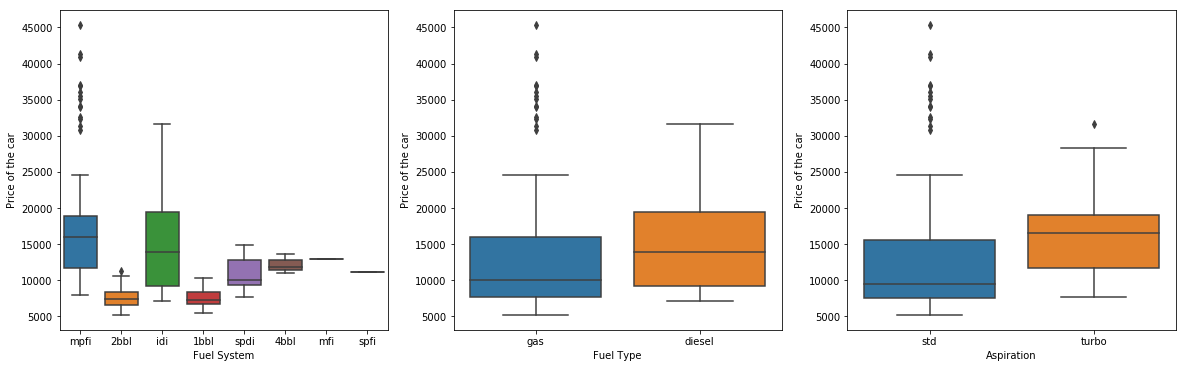

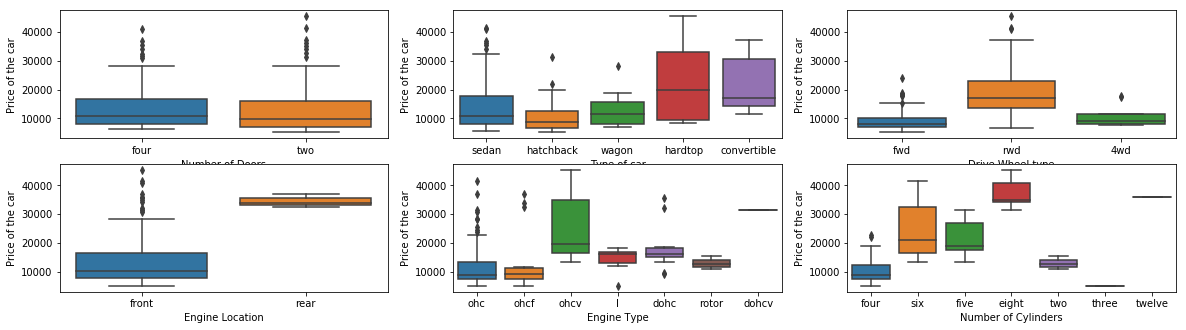

In [928]:
# Creat Box Plots
plt.figure(figsize=(20, 20))

# Fuel System
plt.subplot(331)
sns.boxplot(x ='fuelsystem', y='price', data=car_df, order=['mpfi', '2bbl', 'idi', '1bbl', 'spdi', 
'4bbl', 'mfi', 'spfi']).set(xlabel="Fuel System", ylabel="Price of the car")

#Fuel Type
plt.subplot(332)
sns.boxplot(x= 'fueltype', y='price', data=car_df, order=['gas', 'diesel']).set(xlabel="Fuel Type", 
ylabel="Price of the car")

# Aspiration
plt.subplot(333)
sns.boxplot(x ='aspiration', y='price', data=car_df, order=['std', 'turbo']).set(xlabel="Aspiration", 
ylabel="Price of the car")

#Door number
plt.figure(figsize=(20, 8))
plt.subplot(334)
sns.boxplot(x = 'doornumber', y='price', data=car_df, order=['four', 'two']).set(xlabel="Number of Doors", 
ylabel="Price of the car")                                                                                    
                                                        
#Type of car
plt.subplot(335)
sns.boxplot(x = 'carbody', y='price', data=car_df, order=['sedan', 'hatchback', 'wagon', 'hardtop', 
'convertible']).set(xlabel="Type of car", ylabel="Price of the car")

#Drive Wheel type
plt.subplot(336)
sns.boxplot(x ='drivewheel', y='price', data=car_df, order=['fwd', 'rwd', '4wd']).set(xlabel="Drive Wheel type", 
ylabel="Price of the car")

#Engine Location
plt.subplot(337)
sns.boxplot(x ='enginelocation', y='price', data=car_df, order=['front', 'rear']).set(xlabel="Engine Location", 
ylabel="Price of the car")

#Engine Type
plt.subplot(338)
sns.boxplot(x ='enginetype', y='price', data=car_df, order=['ohc', 'ohcf', 'ohcv', 'l', 'dohc', 'rotor', 'dohcv']).set(xlabel="Engine Type", 
ylabel="Price of the car")

#Number of Cylinders
plt.subplot(339)
sns.boxplot(x ='cylindernumber', y='price', data=car_df, order=['four', 'six', 'five', 'eight', 'two', 'three', 
'twelve']).set(xlabel="Number of Cylinders", ylabel="Price of the car")

plt.show()      # how to understand box plot and outliers

* Here we can see that the median price of the Diesel cars is slightly higher than the Gas cars and also, the demand of diesel cars seems very low.
* Here we can see that the median price of Turbo aspirent cars is significantly higher than price of Standard aspirant cars.
* Hence, Number of Doors is not a significant feature impacting the price of the cars.
* Hence number of doors do not show any direct relationship with the price variable.
* Here we can see that there is very high demand for sedan, hatchback, and wagon cars whose price range is less than 12.5K USD. Hence, Type of car seems to be a significant feature impacting the price of the cars.
* Here we can see that there is very high demand for front wheel and rear wheel drive cars whose median price range is less than lowest among other two type of wheel drives.Hence, Type of car is a significant feature impacting the price of the cars.
* Hence, Number of cylinders seems to be a significant feature for predicting the price of the cars.
* Here we can see that there are very high number for cars with OHC engine as the car with it has a low price.
* Here we can see that there is very high demand for four cylindered engine as the car with it has a low price.

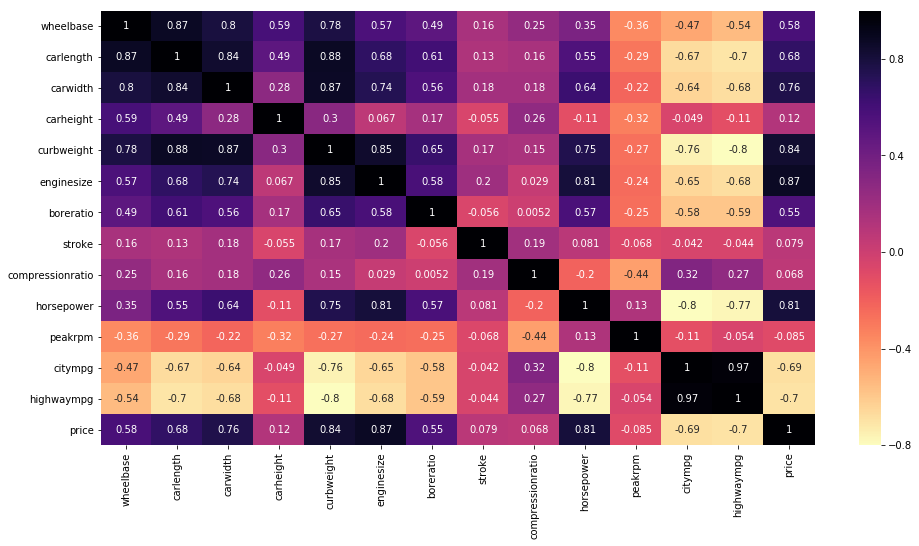

In [929]:
# Let's see the correlation matrix 

# figure size
plt.figure(figsize=(16,8))#gist_hea

# heatmap
sns.heatmap(car_df.corr(), cmap="magma_r", annot=True)
plt.show()        # graph displays
                  # this heatmap show more multicolinerity in features (variable X)
                  # heatmap correlation between many variable

The heatmap shows some useful insights:

**Correlation of price with independent variables:**
- Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)

- Price is negatively correlated to citympg and highwaympg (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

**Correlation among independent variables:**
- Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated
- Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

## Data Preparation
 * Check for any data quality issues
 * Encoding Categorical Variables
 * Creats Dummy variables
 

In [930]:
# Identify the number of categories in each of the categorical variables
car_df[categories_vars].nunique().sort_values()

fueltype           2
aspiration         2
doornumber         2
enginelocation     2
drivewheel         3
carbody            5
symboling          6
enginetype         7
cylindernumber     7
fuelsystem         8
CompanyName       22
dtype: int64

**Encoding Categorical Variables**
- Categorical variables with only two categories i.e, 'fueltype', 'aspiration', 'doornumber' and 'enginelocation' can be encoded using Binary-Encoding mechanism.

- The columns 'drivewheel', 'carbody', 'enginetype', 'cylindernumber' and 'fuelsystem' can be encoded using the Dummy-Encoding mechanism where in if the categorical variable has 'n' categories then 'n-1' new columns are created with 0's and 1's indicating the existennce of a particular category.

- 'CarName' column has the various car companies which are being consided for the analysis. ,'symboling' column has the insurance risk rating ranging from -3(safest) to +3(risky). One-Hot-Encoding mechanism (each category is converted to a seperate column i.e, 'n' categories would result in 'n' new columns) can be used to encode these columns so that all the car companies and rsik ratings are retained in the resultant car_dfset.

In [931]:
car_df.columns

Index(['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [932]:
# Binary-Encoding the columns 'fueltype', 'aspiration', 'doornumber' and 'enginelocation'
car_df['fueltype'] = car_df['fueltype'].map({'gas': 1, 'diesel': 0})
car_df['aspiration'] = car_df['aspiration'].map({'std': 1, 'turbo': 0})
car_df['doornumber'] = car_df['doornumber'].map({'four': 1, 'two': 0})
car_df['enginelocation'] = car_df['enginelocation'].map({'front': 1, 'rear': 0})

In [933]:
car_df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,1,1,0,convertible,rwd,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,1,1,0,convertible,rwd,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,1,1,0,hatchback,rwd,1,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,1,1,1,sedan,fwd,1,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,1,1,1,sedan,4wd,1,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [934]:
car_df.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [935]:
#value mapping
car_df['cylindernumber'] = car_df['cylindernumber'].\
   map({'four': 4, 'six': 6, 'five':5, 'eight':8,'two':2,'twelve':12,'three':3})

car_df.head()


,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,1,1,0,convertible,rwd,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,1,1,0,convertible,rwd,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,1,1,0,hatchback,rwd,1,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,1,1,1,sedan,fwd,1,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,1,1,1,sedan,4wd,1,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [936]:
# Dummy-Encoding the columns 'drivewheel','carbody','enginetype','fuelsystem' , cylindernumber

for var in ['drivewheel','carbody','enginetype','fuelsystem','cylindernumber' ]:
    temp_df = pd.get_dummies(car_df[var], prefix=var)
    car_df = pd.concat([car_df, temp_df], axis = 1)
    car_df.drop(var, axis=1, inplace = True)

# Check the first few rows to see if the Dummy-encoding has happened correctly
car_df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cylindernumber_2,cylindernumber_3,cylindernumber_4,cylindernumber_5,cylindernumber_6,cylindernumber_8,cylindernumber_12
0,3,alfa-romero,1,1,0,1,88.6,168.8,64.1,48.8,...,1,0,0,0,0,1,0,0,0,0
1,3,alfa-romero,1,1,0,1,88.6,168.8,64.1,48.8,...,1,0,0,0,0,1,0,0,0,0
2,1,alfa-romero,1,1,0,1,94.5,171.2,65.5,52.4,...,1,0,0,0,0,0,0,1,0,0
3,2,audi,1,1,1,1,99.8,176.6,66.2,54.3,...,1,0,0,0,0,1,0,0,0,0
4,2,audi,1,1,1,1,99.4,176.6,66.4,54.3,...,1,0,0,0,0,0,1,0,0,0


In [937]:
car_df.shape

(205, 50)

In [938]:
# Defining the map function

# For CarName variable
temp_df = pd.get_dummies(car_df['CompanyName'], prefix='CompanyName') # by not setting drop_first=True, One-Hot-Encoding is achieved
car_df = pd.concat([car_df, temp_df], axis = 1)
car_df.drop('CompanyName', axis=1, inplace = True)

# For symboling variable
temp_df = pd.get_dummies(car_df['symboling'], prefix='symboling') # by not setting drop_first=True, One-Hot-Encoding is achieved
car_df = pd.concat([car_df, temp_df], axis = 1)
car_df.drop('symboling', axis=1, inplace = True)

# Check the first few rows to see if the One-Hot-encoding has happened correctly
car_df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,1
2,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,0,0,1,0,0
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,0,0,0,1,0
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,0,0,1,0


In [939]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 76 columns):
fueltype                   205 non-null int64
aspiration                 205 non-null int64
doornumber                 205 non-null int64
enginelocation             205 non-null int64
wheelbase                  205 non-null float64
carlength                  205 non-null float64
carwidth                   205 non-null float64
carheight                  205 non-null float64
curbweight                 205 non-null int64
enginesize                 205 non-null int64
boreratio                  205 non-null float64
stroke                     205 non-null float64
compressionratio           205 non-null float64
horsepower                 205 non-null int64
peakrpm                    205 non-null int64
citympg                    205 non-null int64
highwaympg                 205 non-null int64
price                      205 non-null float64
drivewheel_4wd             205 non-null uint8
drive

#### Splitting the Data into Training and Testing Sets

In [940]:
from sklearn.model_selection import train_test_split

np.random.seed(0) # Initialize RandomState

# Split Data in the ratio Train:Test = 70%:30
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)


In [941]:
# Applying MinMaxScaler to the original numeric variables

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
122,1,1,1,1,0.244828,0.426016,0.291667,50.8,0.272692,0.139623,...,0,0,0,0,0,0,0,1,0,0
125,1,1,0,1,0.272414,0.452033,0.666667,50.2,0.500388,0.339623,...,0,0,0,0,0,0,0,0,0,1
166,1,1,0,1,0.272414,0.448780,0.308333,52.6,0.314973,0.139623,...,0,1,0,0,0,0,0,1,0,0
1,1,1,0,1,0.068966,0.450407,0.316667,48.8,0.411171,0.260377,...,0,0,0,0,0,0,0,0,0,1
199,1,0,1,1,0.610345,0.775610,0.575000,57.5,0.647401,0.260377,...,0,0,0,1,0,1,0,0,0,0


In [942]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.909091,0.818182,0.559441,0.993007,0.411141,0.525476,0.461655,53.551748,0.407878,0.241351,...,0.076923,0.139860,0.048951,0.041958,0.013986,0.090909,0.349650,0.300699,0.118881,0.125874
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,2.433766,0.211269,0.154619,...,0.267406,0.348061,0.216524,0.201198,0.117845,0.288490,0.478536,0.460174,0.324786,0.332873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,51.800000,0.245539,0.135849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.341379,0.502439,0.425000,53.700000,0.355702,0.184906,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,55.350000,0.559542,0.301887,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,59.100000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [943]:
#Divide the data into X and Y sets for the model building

y_train = df_train.pop('price')
X_train = df_train

## Model Building

In [944]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

from statsmodels.stats.outliers_influence import variance_inflation_factor

**Recursive Feature Elimination**
Since the number of independent variables is very high, we cannot go for Manual feature selection. Hence, we need to automate the process of feature selection for which we can use RFE(Recursive Feature Elimination)

''' TO start with we can set the number of features to be selected to 20 '''

In [945]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)                   # running RFE
rfe = rfe.fit(X_train, y_train)


In [946]:
#rfe_list ==list(zip(X_train.columns,rfe.support_,rfe.ranking_))

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 51),
 ('aspiration', False, 22),
 ('doornumber', False, 54),
 ('enginelocation', True, 1),
 ('wheelbase', False, 28),
 ('carlength', False, 27),
 ('carwidth', True, 1),
 ('carheight', False, 45),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 8),
 ('compressionratio', False, 52),
 ('horsepower', True, 1),
 ('peakrpm', False, 63),
 ('citympg', False, 60),
 ('highwaympg', False, 59),
 ('drivewheel_4wd', False, 62),
 ('drivewheel_fwd', False, 53),
 ('drivewheel_rwd', False, 46),
 ('carbody_convertible', False, 20),
 ('carbody_hardtop', False, 44),
 ('carbody_hatchback', False, 40),
 ('carbody_sedan', False, 47),
 ('carbody_wagon', False, 61),
 ('enginetype_dohc', False, 19),
 ('enginetype_dohcv', False, 33),
 ('enginetype_l', False, 10),
 ('enginetype_ohc', False, 18),
 ('enginetype_ohcf', False, 29),
 ('enginetype_ohcv', False, 13),
 ('enginetype_rotor', False, 6),
 ('fuelsystem_1bbl', False, 41),
 ('fuelsystem_2bbl', 

In [947]:
#selected_columns = X_train.columns[rfe.support_]
#selected_columns

X_train.columns[rfe.support_]

#Building model using statsmodel, for the detailed statistics

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'cylindernumber_2', 'cylindernumber_3',
       'cylindernumber_12', 'CompanyName_bmw'],
      dtype='object')

In [948]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,enginelocation,carwidth,curbweight,enginesize,boreratio,horsepower,cylindernumber_2,cylindernumber_3,cylindernumber_12,CompanyName_bmw
122,1,0.291667,0.272692,0.139623,0.230159,0.083333,0,0,0,0
125,1,0.666667,0.500388,0.339623,1.000000,0.395833,0,0,0,0
166,1,0.308333,0.314973,0.139623,0.444444,0.266667,0,0,0,0
1,1,0.316667,0.411171,0.260377,0.626984,0.262500,0,0,0,0
199,1,0.575000,0.647401,0.260377,0.746032,0.475000,0,0,0,0


In [949]:
import statsmodels.api as sm
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

**Model 1**

In [950]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     130.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.89e-63
Time:                        06:54:49   Log-Likelihood:                 187.88
No. Observations:                 143   AIC:                            -353.8
Df Residuals:                     132   BIC:                            -321.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2697      0.07

In [951]:
checkVIF(X_train_new)

,Features,VIF
0,const,180.70
4,enginesize,8.85
3,curbweight,8.49
2,carwidth,4.64
6,horsepower,3.74
5,boreratio,1.72
9,cylindernumber_12,1.49
7,cylindernumber_2,1.37
1,enginelocation,1.21
10,CompanyName_bmw,1.13


p-vale of  'cylindernumber_12' seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables and build the model.

In [952]:
X_train_new = X_train_new.drop(["cylindernumber_12"], axis = 1)

**Model 2**

In [953]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     145.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.44e-64
Time:                        06:54:52   Log-Likelihood:                 187.36
No. Observations:                 143   AIC:                            -354.7
Df Residuals:                     133   BIC:                            -325.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2825      0.075  

In [954]:
checkVIF(X_train_new)

,Features,VIF
0,const,175.35
3,curbweight,7.97
4,enginesize,6.99
2,carwidth,4.61
6,horsepower,3.73
5,boreratio,1.71
7,cylindernumber_2,1.31
1,enginelocation,1.18
9,CompanyName_bmw,1.09
8,cylindernumber_3,1.05


p-vale of 'boreratio' seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables and build the model.

In [955]:
X_train_new = X_train_new.drop(["boreratio"], axis = 1)

**Model 3**

In [956]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     158.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.02e-64
Time:                        06:54:59   Log-Likelihood:                 184.79
No. Observations:                 143   AIC:                            -351.6
Df Residuals:                     134   BIC:                            -324.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2402      0.074  

In [959]:
checkVIF(X_train_new)

,Features,VIF
0,const,163.89
3,curbweight,7.58
4,enginesize,6.98
2,carwidth,4.56
5,horsepower,3.73
6,cylindernumber_2,1.31
1,enginelocation,1.15
8,CompanyName_bmw,1.09
7,cylindernumber_3,1.05


p-vale of "horsepower" seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables and build the model.

In [960]:
X_train_new = X_train_new.drop(["horsepower"], axis = 1)

**Model 4**

In [961]:
X_train_new = build_model(X_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     178.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.64e-65
Time:                        06:56:40   Log-Likelihood:                 183.34
No. Observations:                 143   AIC:                            -350.7
Df Residuals:                     135   BIC:                            -327.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2648      0.072  

In [962]:
checkVIF(X_train_new)

,Features,VIF
0,const,157.20
3,curbweight,7.57
4,enginesize,5.07
2,carwidth,4.51
5,cylindernumber_2,1.17
1,enginelocation,1.09
7,CompanyName_bmw,1.09
6,cylindernumber_3,1.05


In [963]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

**Residual Analysis of the train data**

Text(0.5, 0, 'Errors')

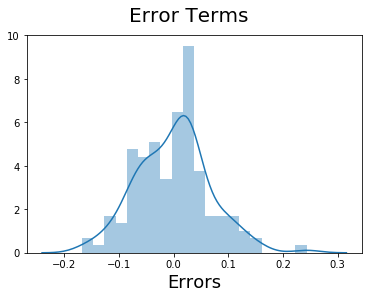

In [964]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

## Prediction and Evaluation

In [965]:
#Applying the scaling on the test sets

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

**Dividing into X_test and y_test**

In [966]:
#Dividing into X and y

y_test = df_test.pop('price')
X_test = df_test

In [967]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [968]:
# Making predictions

y_pred = lm.predict(X_test_new)

Evaluation of test via comparison of y_pred and y_test

**R-squared score on the test set.**

In [969]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8322005408695717

Text(0, 0.5, 'y_pred')

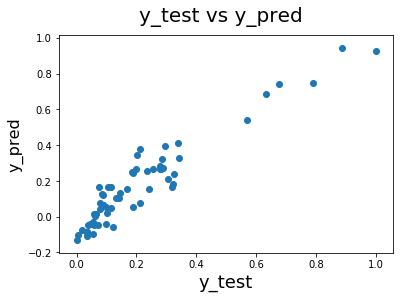

In [970]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

Text(0, 0.5, 'Price')

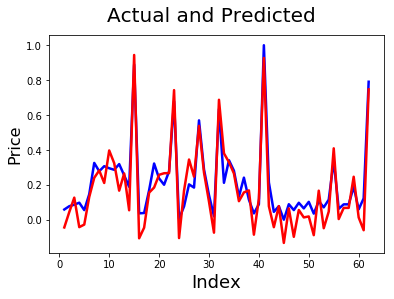

In [971]:
#Actual vs Predicted

c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)    

Text(0, 0.5, 'Actual_Price - Predicted_Price')

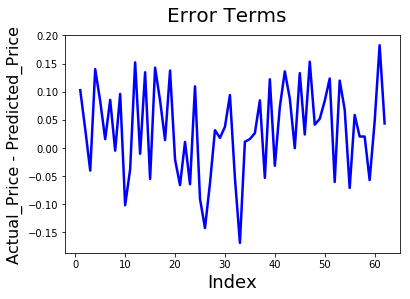

In [972]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test - y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Actual_Price - Predicted_Price', fontsize=16)                # Y-label